<a href="https://colab.research.google.com/github/Hjhirp/Climate-Change-Prediction/blob/main/Notebook/Final_Dataset_First_Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/OMDENA SV
# %cd /content/drive/MyDrive/datasets

/content/drive/MyDrive/OMDENA SV


In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.shape

(75757, 64)

In [ ]:
df.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

### Dropping 1

In [ ]:
Drop = ['building_class','avg_temp','days_above_100F','days_above_110F','direction_max_wind_speed',
       'direction_peak_wind_speed', 'max_wind_speed','id']

In [ ]:
train_data= df.drop(Drop,axis =1)

In [ ]:
print(len(df.columns))
print(len(train_data.columns))

64
56


In [ ]:
train_data['Energy'] = train_data['floor_area']*train_data['site_eui']

In [ ]:
train_data['facility_type'].nunique()

60

### Months to season and dropping 2

In [ ]:
train_data['winter_average_temp'] = (train_data['january_avg_temp'] + train_data['february_avg_temp'] + train_data['december_avg_temp'])/3
train_data['summer_average_temp'] = (train_data['june_avg_temp'] + train_data['july_avg_temp'] + train_data['august_avg_temp'])/3
train_data['fall_average_temp'] = (train_data['september_avg_temp'] + train_data['october_avg_temp'] + train_data['november_avg_temp'])/3
train_data['spring_average_temp'] = (train_data['march_avg_temp'] + train_data['april_avg_temp'] + train_data['may_avg_temp'])/3

train_data['winter_average_maxtemp'] = (train_data['january_max_temp'] + train_data['february_max_temp'] + train_data['december_max_temp'])/3
train_data['summer_average_maxtemp'] = (train_data['june_max_temp'] + train_data['july_max_temp'] + train_data['august_max_temp'])/3
train_data['fall_average_maxtemp'] = (train_data['september_max_temp'] + train_data['october_max_temp'] + train_data['november_max_temp'])/3
train_data['spring_average_maxtemp'] = (train_data['march_max_temp'] + train_data['april_max_temp'] + train_data['may_max_temp'])/3

train_data['winter_average_mintemp'] = (train_data['january_min_temp'] + train_data['february_min_temp'] + train_data['december_min_temp'])/3
train_data['summer_average_mintemp'] = (train_data['june_min_temp'] + train_data['july_min_temp'] + train_data['august_min_temp'])/3
train_data['fall_average_mintemp'] = (train_data['september_min_temp'] + train_data['october_min_temp'] + train_data['november_min_temp'])/3
train_data['spring_average_mintemp'] = (train_data['march_min_temp'] + train_data['april_min_temp'] + train_data['may_min_temp'])/3

train_data.head()

,Year_Factor,State_Factor,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_with_fog,site_eui,Energy,winter_average_temp,summer_average_temp,fall_average_temp,spring_average_temp,winter_average_maxtemp,summer_average_maxtemp,fall_average_maxtemp,spring_average_maxtemp,winter_average_mintemp,summer_average_mintemp,fall_average_mintemp,spring_average_mintemp
0,1,State_1,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,0,0,0,0,14,0,NaN,248.682615,1.522982e+07,50.12116,61.795699,60.48871,55.349462,70.666667,86.333333,81.666667,80.666667,35.666667,51.333333,47.333333,42.333333
1,1,State_1,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,0,0,0,0,14,0,12.0,26.500150,7.261041e+06,50.12116,61.795699,60.48871,55.349462,70.666667,86.333333,81.666667,80.666667,35.666667,51.333333,47.333333,42.333333
2,1,State_1,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,0,0,0,0,14,0,12.0,24.693619,6.914831e+06,50.12116,61.795699,60.48871,55.349462,70.666667,86.333333,81.666667,80.666667,35.666667,51.333333,47.333333,42.333333
3,1,State_1,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,0,0,0,0,14,0,12.0,48.406926,2.678113e+06,50.12116,61.795699,60.48871,55.349462,70.666667,86.333333,81.666667,80.666667,35.666667,51.333333,47.333333,42.333333
4,1,State_1,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,0,0,0,0,14,0,NaN,3.899395,2.573601e+05,50.12116,61.795699,60.48871,55.349462,70.666667,86.333333,81.666667,80.666667,35.666667,51.333333,47.333333,42.333333


In [ ]:
print(len(train_data.columns))

69


In [ ]:
Dropped_temp = ['january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp']

train_data = train_data.drop(Dropped_temp,axis =1)

### Facility type

In [ ]:
facility_type = df['facility_type']

In [ ]:
train_data["facility_type"]=train_data["facility_type"].replace(['Warehouse_Refrigerated','Warehouse_Uncategorized'],"Warehouse_Low")
train_data["facility_type"]=train_data["facility_type"].replace(['Warehouse_Selfstorage','Warehouse_Distribution_or_Shipping_center'],"Warehouse_Med")
train_data["facility_type"]=train_data["facility_type"].replace(['Warehouse_Nonrefrigerated','Data_Center'],"Warehouse_High")

train_data["facility_type"]=train_data["facility_type"].replace(['Mixed_Use_Predominantly_Commercial','Retail_Vehicle_dealership_showroom'],"Commercial_Low")
train_data["facility_type"]=train_data["facility_type"].replace(['Commercial_Other','Commercial_Unknown','Mixed_Use_Commercial_and_Residential','Retail_Enclosed_mall','Retail_Strip_shopping_mall','Retail_Uncategorized'],"Commercial_High")

train_data["facility_type"]=train_data["facility_type"].replace(['Lodging_Uncategorized'],"Lodging_Low")
train_data["facility_type"]=train_data["facility_type"].replace(['Lodging_Other'],"Lodging_Med")
train_data["facility_type"]=train_data["facility_type"].replace(['Lodging_Dormitory_or_fraternity_sorority','Lodging_Hotel'],"Lodging_High")

train_data["facility_type"]=train_data["facility_type"].replace(['Education_Preschool_or_daycare'],"Educational_Low")
train_data["facility_type"]=train_data["facility_type"].replace(['Education_College_or_university','Education_Other_classroom','Education_Uncategorized'],"Educational_High")

train_data["facility_type"]=train_data["facility_type"].replace(['Food_Service_Other'],"Food_Low")
train_data["facility_type"]=train_data["facility_type"].replace(['Food_Service_Restaurant_or_cafeteria','Food_Service_Uncategorized','Grocery_store_or_food_market'],"Food_Med")
train_data["facility_type"]=train_data["facility_type"].replace(['Food_Sales'],"Food_High")

train_data["facility_type"]=train_data["facility_type"].replace(['Public_Assembly_Library','Public_Assembly_Movie_Theater','Public_Assembly_Stadium' , 'Public_Safety_Fire_or_police_station','Public_Safety_Penitentiary','Public_Safety_Uncategorized','Religious_worship'],"Public_Services_Low")
train_data["facility_type"]=train_data["facility_type"].replace(['Parking_Garage','Public_Assembly_Entertainment_culture','Public_Assembly_Other' , 'Public_Assembly_Social_meeting','Public_Assembly_Uncategorized','Public_Safety_Courthouse'],"Public_Services_High")

train_data["facility_type"]=train_data["facility_type"].replace(['Service_Drycleaning_or_Laundry'],"Services_Low")
train_data["facility_type"]=train_data["facility_type"].replace(['Service_Uncategorized','Service_Vehicle_service_repair_shop'],"Services_High")

train_data["facility_type"]=train_data["facility_type"].replace(['Health_Care_Outpatient_Clinic','Health_Care_Outpatient_Uncategorized','Nursing_Home','Office_Medical_non_diagnostic'],"Healthcare_Low")
train_data["facility_type"]=train_data["facility_type"].replace(['Health_Care_Uncategorized','Health_Care_Inpatient','Laboratory'],"Healthcare_High")

train_data["facility_type"]=train_data["facility_type"].replace(['Office_Mixed_use'],"Office_Low")
train_data["facility_type"]=train_data["facility_type"].replace(['Office_Bank_or_other_financial','Office_Uncategorized'],"Office_High")

train_data["facility_type"]=train_data["facility_type"].replace(['Mixed_Use_Predominantly_Residential'],"Residential_Low")
train_data["facility_type"]=train_data["facility_type"].replace(['2to4_Unit_Building','5plus_Unit_Building'],"Residential_Med")
train_data["facility_type"]=train_data["facility_type"].replace(['Multifamily_Uncategorized'],"Residential_High")

In [ ]:
train_data['facility_type'] = train_data["facility_type"].dropna()

In [ ]:
train_data['facility_type_group'] = train_data['facility_type']

### Encoding for facility_type

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train_data['facility_type'] = le.fit_transform(train_data['facility_type'])

Imputations of year_built

In [ ]:
# Before doing any scaling, imputation, or clustering that's using distance-based algorithms, we first have to split the data
from sklearn.model_selection import train_test_split
training_cols = [col for col in train_data.columns if col != 'site_eui']
X = train_data[training_cols]
y = train_data['site_eui']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [ ]:
def ordinal_encode_for_knn_imputer(data):
  """
  Writer: Dongyeun K.
  Description: This is for preprocessing job before passing the data to KNNImputer
  """
  from sklearn.preprocessing import OrdinalEncoder

  # Encode facility_type_group
  facility_type_group_ord_encoder = OrdinalEncoder()
  facility_type_group_reshaped = data['facility_type_group'].values.reshape(-1, 1)
  facility_type_group_encoded = facility_type_group_ord_encoder.fit_transform(facility_type_group_reshaped)

  # Encode State_Factor
  state_factor_ord_encoder = OrdinalEncoder()
  state_factor_reshaped = data['State_Factor'].values.reshape(-1, 1)
  state_factor_encoded = state_factor_ord_encoder.fit_transform(state_factor_reshaped)

  # Add encoded columns
  data['facility_type_group_enc'] = np.squeeze(facility_type_group_encoded)
  data['state_factor_enc'] = np.squeeze(state_factor_encoded)

  # Drop original columns
  data.drop(['State_Factor', 'facility_type_group'], axis=1, inplace=True)

  return data


def find_optimal_n(data, start_range, end_range, step=2, target='site_eui'):
  """
  Wrtier: Dongyeun Kum
  Description: Interatively calculates RMSE for a given rage of number_of_neighbors parameter;Denoted as 'n'
  """
  from sklearn.model_selection import train_test_split
  from sklearn.preprocessing import RobustScaler
  from sklearn.ensemble import GradientBoostingRegressor
  from sklearn.impute import KNNImputer
  from sklearn.metrics import mean_squared_error
  X = data.drop(target, axis=1)
  y = data[target]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

  # Scale data X before feeding the KNNImputer
  transformer = RobustScaler()
  X_train_scaled_arr = transformer.fit_transform(X_train)
  X_test_scaled_arr = transformer.transform(X_test)

  X_train_scaled = pd.DataFrame(X_train_scaled_arr, columns=X_train.columns)
  X_test_scaled = pd.DataFrame(X_test_scaled_arr, columns=X_test.columns)

  errors = []

  for n in range(start_range, end_range, step):
    imputer = KNNImputer(n_neighbors= n)
    X_train_imputed_arr = imputer.fit_transform(X_train_scaled)
    X_test_imputed_arr = imputer.transform(X_test_scaled)

    X_train_imputed = pd.DataFrame(X_train_imputed_arr, columns = X_train_scaled.columns)
    X_test_imputed = pd.DataFrame(X_test_imputed_arr, columns = X_test_scaled.columns)

    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_train_imputed, y_train)
    y_pred = model.predict(X_test_imputed)
    error = (mean_squared_error(y_test, y_pred))**0.5

    errors.append({'num_of_neighbors': n, 'RMSE': error})

  df_errors = pd.DataFrame(errors)

  return df_errors


def visualize_knn_optimization(df_errors):
  """
  Writer: Dongyeun Kum
  Description: Visualizes how RMSE varies as n of KNN changes
  """
  import seaborn as sns

  sns.lineplot(df_errors.num_of_neighbors, df_errors.RMSE)
  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

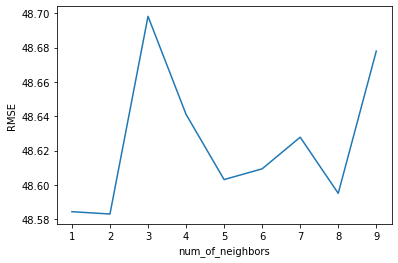

In [ ]:
# Get optimal number of neighbors for KNNImputer
data_temp = train_data[['Year_Factor', 'State_Factor', 'facility_type_group', 'floor_area', 'year_built', 'site_eui']]
data_temp_ordinal = ordinal_encode_for_knn_imputer(data_temp)
df_errors = find_optimal_n(data_temp_ordinal, 1, 10, step=1)
visualize_knn_optimization(df_errors)

In [ ]:
# KNN Imputation with the optimal n - This process is to be functionized soon
import copy
from sklearn.preprocessing import RobustScaler, OrdinalEncoder, StandardScaler
from sklearn.impute import KNNImputer

X_train_copy = copy.deepcopy(X_train)
X_test_copy = copy.deepcopy(X_test)

ord_encoder = OrdinalEncoder()
transformer = RobustScaler()
KNN_imputer = KNNImputer(n_neighbors=4) # the optimal n=4

knn_cols = ['Year_Factor', 'state_factor_enc', 'facility_type_group_enc', 'floor_area', 'year_built']

X_train_copy_enc = ordinal_encode_for_knn_imputer(X_train_copy) # ordinal encoding
X_test_copy_enc = ordinal_encode_for_knn_imputer(X_test_copy)

X_train_copy_scaled_arr = transformer.fit_transform(X_train_copy_enc[knn_cols]) # scaling
X_test_copy_scaled_arr = transformer.transform(X_test_copy_enc[knn_cols]) # scaling

X_train_copy_scaled = pd.DataFrame(X_train_copy_scaled_arr, columns=knn_cols, index=X_train_copy_enc.index)
X_test_copy_scaled = pd.DataFrame(X_test_copy_scaled_arr, columns=knn_cols, index=X_test_copy_enc.index)

X_train_copy_knn_imputed_arr = KNN_imputer.fit_transform(X_train_copy_scaled[['Year_Factor', 'state_factor_enc', 'facility_type_group_enc', 'floor_area', 'year_built']])
X_test_copy_knn_imputed_arr = KNN_imputer.transform(X_test_copy_scaled[['Year_Factor', 'state_factor_enc', 'facility_type_group_enc', 'floor_area', 'year_built']])

X_train_copy_knn_imputed = transformer.inverse_transform(X_train_copy_knn_imputed_arr)
X_test_copy_knn_imputed = transformer.inverse_transform(X_test_copy_knn_imputed_arr)

X_train_copy_knn_imputed = pd.DataFrame(X_train_copy_knn_imputed, columns= knn_cols, index = X_train_copy_enc.index)
X_test_copy_knn_imputed = pd.DataFrame(X_test_copy_knn_imputed, columns= knn_cols, index = X_test_copy_enc.index)

X_train_copy_knn_imputed # Check the results

,Year_Factor,state_factor_enc,facility_type_group_enc,floor_area,year_built
13184,6.0,4.0,2.0,86700.0,1959.0
18163,2.0,5.0,13.0,574857.0,1990.0
74041,6.0,2.0,21.0,70200.0,1979.0
16247,1.0,5.0,13.0,2837932.0,1970.0
50301,5.0,5.0,19.0,57960.0,1928.0
...,...,...,...,...,...
37194,4.0,5.0,19.0,189595.0,1956.0
6265,4.0,3.0,19.0,115323.0,1959.0
54886,6.0,5.0,2.0,104400.0,1971.0
860,2.0,0.0,13.0,249960.0,2000.0


In [ ]:
# Replace NaN values in year_built - X_train
X_train['year_built_imputed'] = round(X_train_copy_knn_imputed['year_built'])

print(train_data.year_built_imputed.isnull().sum())
X_train[['year_built', 'year_built_imputed']]

22728


,year_built,year_built_imputed
13184,1959.0,1959.0
18163,1990.0,1990.0
74041,1979.0,1979.0
16247,1970.0,1970.0
50301,1928.0,1928.0
...,...,...
37194,1956.0,1956.0
6265,1959.0,1959.0
54886,1971.0,1971.0
860,2000.0,2000.0


In [ ]:
X_test['year_built_imputed'] = round(X_test_copy_knn_imputed['year_built'])

print(X_test.year_built_imputed.isnull().sum())
X_test[['year_built', 'year_built_imputed']]

0


,year_built,year_built_imputed
29922,1990.0,1990.0
55120,1928.0,1928.0
52830,1941.0,1941.0
47809,1957.0,1957.0
4663,1931.0,1931.0
...,...,...
58035,1985.0,1985.0
22091,NaN,1938.0
45011,1898.0,1898.0
24314,1949.0,1949.0


### Imputation - LGBM

In [ ]:
# To prevent cloning the repo in Drive folder
import os
os.chdir('/content')

In [ ]:
!git clone https://github.com/analokmaus/kuma_utils.git

Cloning into 'kuma_utils'...
remote: Enumerating objects: 895, done.
remote: Counting objects: 100% (611/611), done.
remote: Compressing objects: 100% (429/429), done.
remote: Total 895 (delta 379), reused 393 (delta 172), pack-reused 284
Receiving objects: 100% (895/895), 694.50 KiB | 6.68 MiB/s, done.
Resolving deltas: 100% (566/566), done.


In [ ]:
train_data.isnull().sum()

Year_Factor                   0
State_Factor                  0
facility_type                 0
floor_area                    0
year_built                 1837
energy_star_rating        26709
ELEVATION                     0
cooling_degree_days           0
heating_degree_days           0
precipitation_inches          0
snowfall_inches               0
snowdepth_inches              0
days_below_30F                0
days_below_20F                0
days_below_10F                0
days_below_0F                 0
days_above_80F                0
days_above_90F                0
days_with_fog             45796
site_eui                      0
Energy                        0
winter_average_temp           0
summer_average_temp           0
fall_average_temp             0
spring_average_temp           0
winter_average_maxtemp        0
summer_average_maxtemp        0
fall_average_maxtemp          0
spring_average_maxtemp        0
winter_average_mintemp        0
summer_average_mintemp        0
fall_ave

In [ ]:
import sys
sys.path.append("kuma_utils/")
from kuma_utils.preprocessing.imputer import LGBMImputer

In [ ]:
#By Nandidni
selective_columns = ['ELEVATION', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'avg_temp','winter_average_temp', 'summer_average_temp',
       'fall_average_temp', 'spring_average_temp',
       'winter_average_maxtemp', 'summer_average_maxtemp',
       'fall_average_maxtemp', 'spring_average_maxtemp',
       'winter_average_mintemp', 'summer_average_mintemp',
       'fall_average_mintemp', 'spring_average_mintemp', 'days_with_fog']

In [ ]:
%%time
lgbm_imtr = LGBMImputer(n_iter=200, verbose=True)

lgbm_imtr.fit(X_train)
train_lgbmimp = lgbm_imtr.transform(X_train[selective_columns])

  0%|          | 0/3 [00:00<?, ?it/s]

ValueError: ignored

In [ ]:
train_lgbmimp.isnull().sum()

facility_type             0
floor_area                0
year_built                0
ELEVATION                 0
cooling_degree_days       0
heating_degree_days       0
precipitation_inches      0
snowfall_inches           0
snowdepth_inches          0
days_below_30F            0
days_below_20F            0
days_below_10F            0
days_below_0F             0
days_above_80F            0
days_above_90F            0
days_with_fog             0
site_eui                  0
Energy                    0
winter_average_temp       0
summer_average_temp       0
fall_average_temp         0
spring_average_temp       0
winter_average_maxtemp    0
summer_average_maxtemp    0
fall_average_maxtemp      0
spring_average_maxtemp    0
winter_average_mintemp    0
summer_average_mintemp    0
fall_average_mintemp      0
spring_average_mintemp    0
dtype: int64

In [ ]:
train_data['days_with_fog'] = train_lgbmimp['days_with_fog']
train_data.isnull().sum()

facility_type             0
floor_area                0
year_built                0
ELEVATION                 0
cooling_degree_days       0
heating_degree_days       0
precipitation_inches      0
snowfall_inches           0
snowdepth_inches          0
days_below_30F            0
days_below_20F            0
days_below_10F            0
days_below_0F             0
days_above_80F            0
days_above_90F            0
days_with_fog             0
site_eui                  0
Energy                    0
winter_average_temp       0
summer_average_temp       0
fall_average_temp         0
spring_average_temp       0
winter_average_maxtemp    0
summer_average_maxtemp    0
fall_average_maxtemp      0
spring_average_maxtemp    0
winter_average_mintemp    0
summer_average_mintemp    0
fall_average_mintemp      0
spring_average_mintemp    0
dtype: int64

### SCALING

In [ ]:
train_data.shape

(75757, 30)

In [ ]:
features = ['days_below_30F', 'days_below_20F', 'days_below_10F', 'heating_degree_days']

In [ ]:
from sklearn.preprocessing import StandardScaler
train_data_tmp = train_data.loc[:,features].values
train_data_tmp = StandardScaler().fit_transform(train_data_tmp)
np.mean(train_data_tmp), np.std(train_data_tmp)

(2.2510164946133566e-17, 1.0)

In [ ]:
feat_col = ['feature'+str(i) for i in range(train_data_tmp.shape[1])]

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
train_data['Cold_PCA'] = pca.fit_transform(train_data_tmp)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.84591557]


In [ ]:
train_data['Cold_PCA'].head(10)

0   -2.659102
1   -2.659102
2   -2.659102
3   -2.659102
4   -2.659102
5   -2.659102
6   -2.659102
7   -2.659102
8   -2.659102
9   -2.659102
Name: Cold_PCA, dtype: float64

DROPPING FEATURES - A list mentioned above

In [ ]:
train_data.drop(features,axis=1,inplace=True)

In [ ]:
train_data.shape

(75757, 27)

### Droping Duplicates

In [ ]:
train_data.drop_duplicates(inplace=True)

In [ ]:
train_data.shape

SAVING THE DATA

In [ ]:
train_data.to_csv('train1.csv')

### Training

In [ ]:
def rmse(y_actual, y_pred):
  """
  Wrtier: Dongyeun Kum
  Description: Calculates RMSE for a given model
  """
  from sklearn.metrics import mean_squared_error
  from math import sqrt

  rmse = sqrt(mean_squared_error(y_actual, y_pred))

  return rmse

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

target = 'site_eui'

X = train_lgbmimp.drop(target, axis=1)
y = train_lgbmimp[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
error = rmse(y_test, y_pred)
error

8.820574281899285

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn import metrics

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print('Linear Regression Train Score :', lr.score(X_train, y_train))
print('Linear Regression Test Score :', lr.score(X_test, y_test))

y_pred1 = lr.predict(X_test)
RMSE1 = np.sqrt(metrics.mean_squared_error(y_test, y_pred1))
print('RMSE Value :', RMSE1)

Linear Regression Train Score : 0.3066815912873151
Linear Regression Test Score : 0.2628010767522695
RMSE Value : 48.575750100875695


In [ ]:
rf = RandomForestRegressor(n_estimators=700, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

print('Random Forest Regressor Train Score :', rf.score(X_train, y_train))
print('Random Forest Regressor Test Score :', rf.score(X_test, y_test))

y_pred2 = rf.predict(X_test)
RMSE2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred2))
print('RMSE Value :', RMSE2)

Random Forest Regressor Train Score : 0.9924105501644459
Random Forest Regressor Test Score : 0.9855295645553963
RMSE Value : 6.8056242861059415


In [ ]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror', n_estimators=700, max_depth=10, seed=42)
xg.fit(X_train, y_train)

print('xgboost Regressor Train Score :', xg.score(X_train, y_train))
print('xgboost Regressor Test Score :', xg.score(X_test, y_test))

y_pred3 = xg.predict(X_test)
RMSE3 = np.sqrt(metrics.mean_squared_error(y_test, y_pred3))
print('RMSE value :', RMSE3)

xgboost Regressor Train Score : 0.9999851073180371
xgboost Regressor Test Score : 0.9948312983231088
RMSE value : 4.0674095393198435
